In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [39]:
df=pd.read_csv('loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [40]:
df.shape

(39717, 111)

In [41]:
# Checking for misssing value
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [42]:
# Checking for percentage misssing value
df.isnull().sum()/df.shape[0]*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [43]:
# Removing column with 50% or more null values as it will reduce the impact on analysis
df = df.loc[:,df.isnull().sum()/df.shape[0]*100<50]

In [44]:
# Checking for missing values across the rows
(df.isnull().sum(axis=1)).max()

6

In [45]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [46]:
# Correcting data type and format for columns in the dataframe and derving more columns 
df.issue_d=pd.to_datetime(df.issue_d,format='%b-%y')
df['issue_year']=pd.to_datetime(df.issue_d,format='%b-%y').dt.year


In [47]:
# Considering necessary columns
df = df[['loan_amnt','term','int_rate','grade','emp_length','home_ownership','verification_status','annual_inc','loan_status','purpose','dti','pub_rec_bankruptcies','issue_year']]

In [48]:
# Correcting data type and format for columns
df.term=df.term.apply(lambda x: str(x).replace(' months','')).astype(int)
df.int_rate=df.int_rate.apply(lambda x:str(x).replace('%','')).astype('float').round(2)
df.emp_length=df.emp_length.apply(lambda x: str(x).replace('years','').replace('+','').replace('< 1','0.5').replace('year','')).astype(float)
df.grade=df.grade.astype('category')
df.home_ownership=df.home_ownership.astype('category')
df.verification_status=df.verification_status.astype('category')

In [49]:
# Removing of candidates with loan status "current" as they are not labelled as 'defaulted'
df = df[df.loan_status != 'Current']

In [50]:
df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,verification_status,annual_inc,loan_status,purpose,dti,pub_rec_bankruptcies,issue_year
0,5000,36,10.65,B,10.0,RENT,Verified,24000.0,Fully Paid,credit_card,27.65,0.0,2011
1,2500,60,15.27,C,0.5,RENT,Source Verified,30000.0,Charged Off,car,1.00,0.0,2011
2,2400,36,15.96,C,10.0,RENT,Not Verified,12252.0,Fully Paid,small_business,8.72,0.0,2011
3,10000,36,13.49,C,10.0,RENT,Source Verified,49200.0,Fully Paid,other,20.00,0.0,2011
5,5000,36,7.90,A,3.0,RENT,Source Verified,36000.0,Fully Paid,wedding,11.20,0.0,2011


In [51]:
df.shape

(38577, 13)

 # Univariate Analysis

Fully Paid     85.413588
Charged Off    14.586412
Name: loan_status, dtype: float64


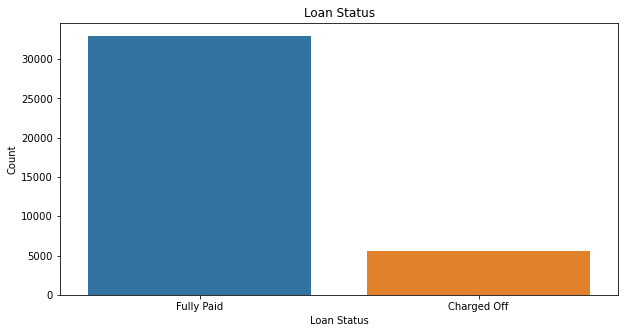

In [52]:
# Countplot for loan status
print(df.loan_status.value_counts()*100/df.loan_status.count())
plt.figure(figsize=(10,5))
ax=sns.countplot(df.loan_status)
ax.set_title('Loan Status')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Count')
plt.show()

36    75.42318
60    24.57682
Name: term, dtype: float64


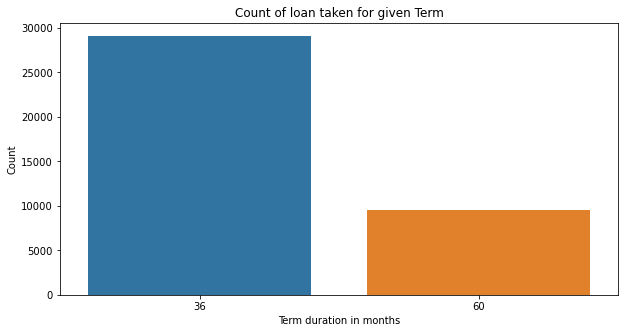

In [53]:
# Countplot for term of loan
print(df.term.value_counts()*100/df.term.count())
plt.figure(figsize=(10,5))
ax=sns.countplot(df.term)
ax.set_title('Count of loan taken for given Term')
ax.set_xlabel('Term duration in months')
ax.set_ylabel('Count')
plt.show()

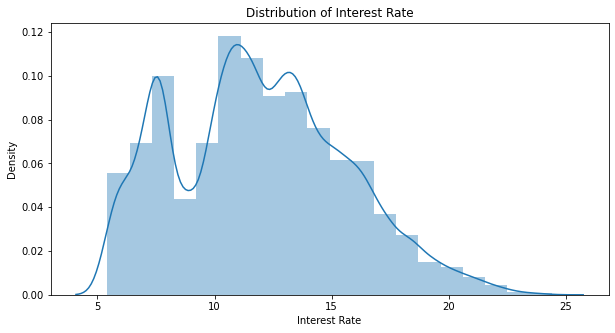

In [54]:
# Distribution of interest rate
plt.figure(figsize=(10,5))
sns.distplot(sorted(df.int_rate),kde=True,bins=20)
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Distribution of Interest Rate')
plt.show()

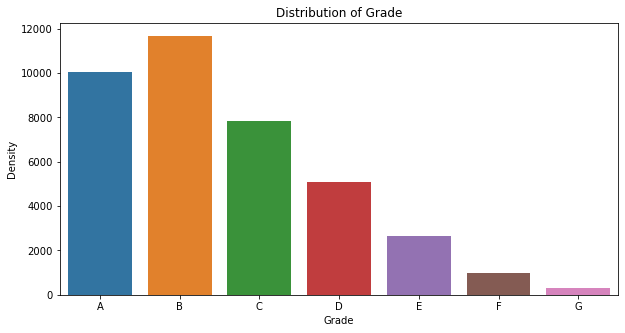

In [55]:
# Distribution of grade
plt.figure(figsize=(10,5))
sns.countplot(df.grade)
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Distribution of Grade')
plt.show()

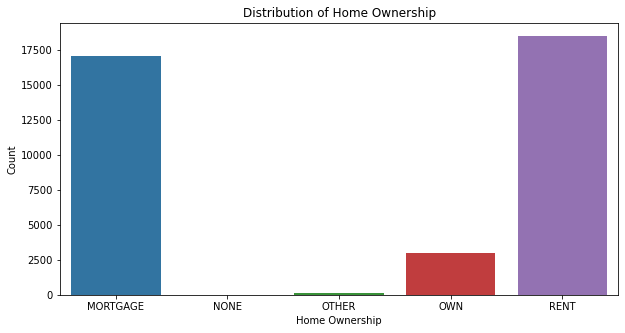

In [56]:
# Distribution of home ownership
plt.figure(figsize=(10,5))
sns.countplot(df.home_ownership)
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership',fontsize=12)
plt.show()

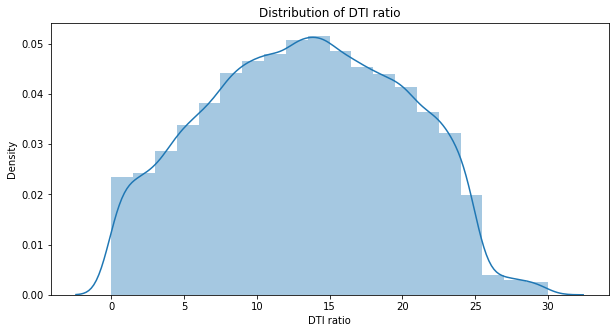

In [57]:
# Distribution of dti
plt.figure(figsize=(10,5))
sns.distplot(df.dti,kde=True,bins=20)
plt.xlabel('DTI ratio')
plt.ylabel('Density')
plt.title('Distribution of DTI ratio',fontsize=12)
plt.show()

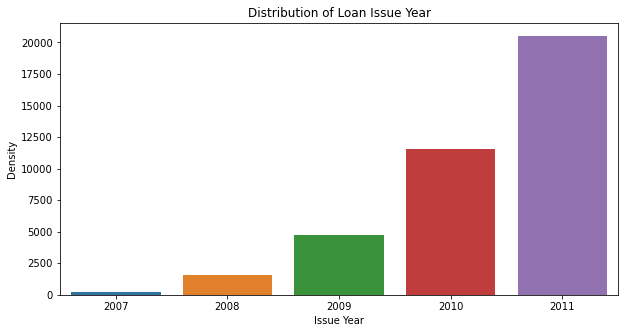

In [58]:
# Distribution of issue year
plt.figure(figsize=(10,5))
sns.countplot(df.issue_year)
plt.xlabel('Issue Year')
plt.ylabel('Density')
plt.title('Distribution of Loan Issue Year',fontsize=12)
plt.show()

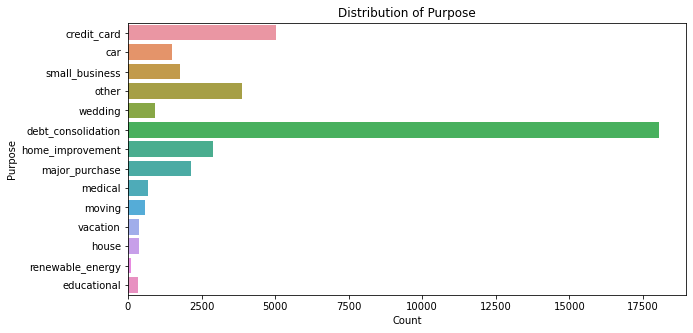

In [59]:
# Distribution of purpose
plt.figure(figsize=(10,5))
sns.countplot(y=df.purpose)
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Distribution of Purpose',fontsize=12)
plt.show()

# Segmented Univariate Analysis

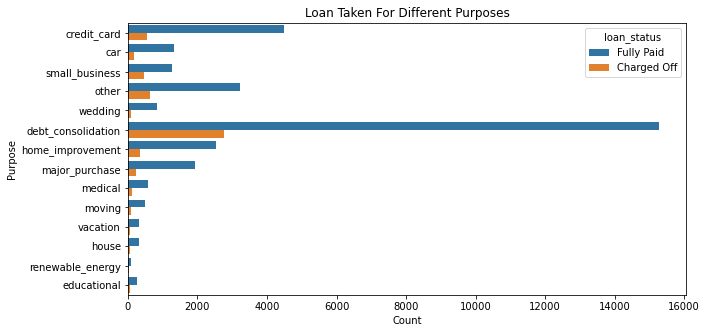

In [60]:
# Distribution of purpose based on loan status
plt.figure(figsize=(10,5))
sns.countplot(data=df,y='purpose',hue='loan_status')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Loan Taken For Different Purposes',fontsize=12)
plt.show()

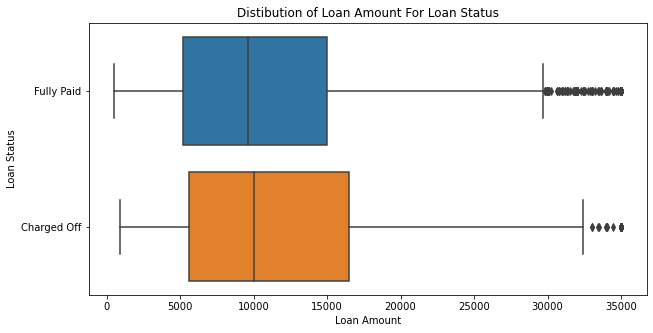

In [61]:
# Distribution of loan amnt based on loan status
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='loan_amnt',y='loan_status')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Distibution of Loan Amount For Loan Status',fontsize=12)
plt.show()

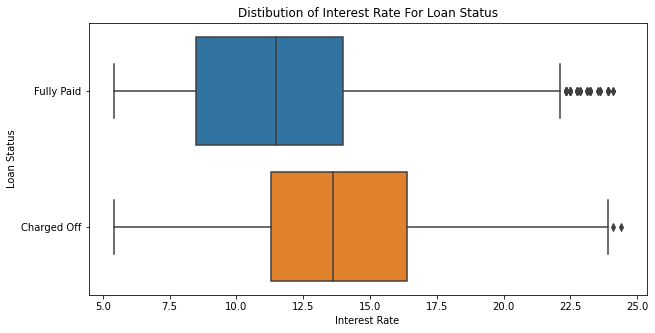

In [62]:
# Distribution of interest rate based on loan status
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='int_rate',y='loan_status')
plt.xlabel('Interest Rate')
plt.ylabel('Loan Status')
plt.title('Distibution of Interest Rate For Loan Status',fontsize=12)
plt.show()

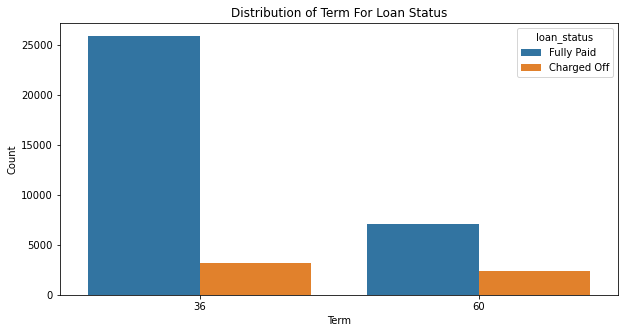

In [63]:
# Distribution of Term based on loan status
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='term',hue='loan_status')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Loan Status',fontsize=12)
plt.show()

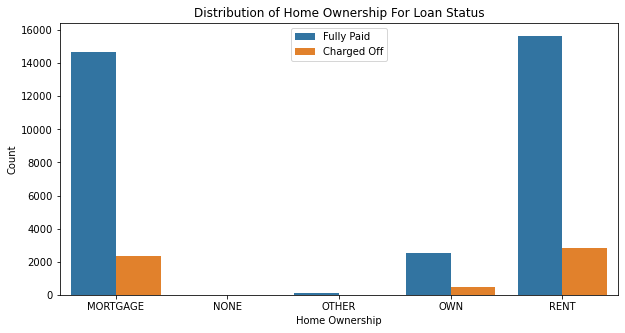

In [64]:
# Distribution of house ownership based on loan status
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='home_ownership',hue='loan_status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership For Loan Status',fontsize=12)
plt.legend(loc='upper center')
plt.show()

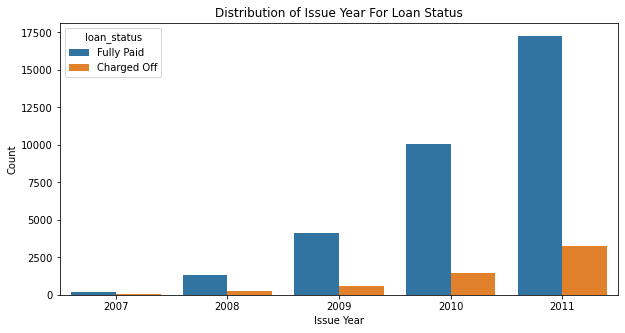

In [65]:
# Distribution of loan status based on issue year
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='issue_year',hue='loan_status')
plt.xlabel('Issue Year')
plt.ylabel('Count')
plt.title('Distribution of Issue Year For Loan Status',fontsize=12)
plt.show()

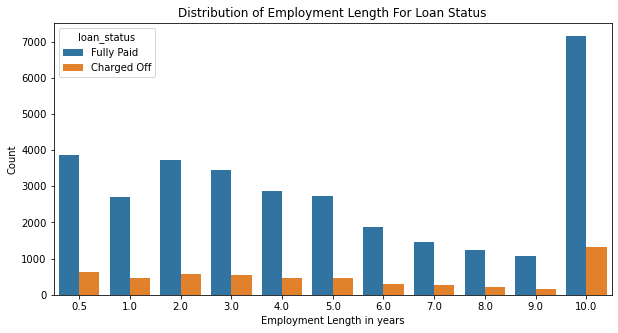

In [66]:
# Distribution of employment length based on loan status
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='emp_length',hue='loan_status')
plt.xlabel('Employment Length in years')
plt.ylabel('Count')
plt.title('Distribution of Employment Length For Loan Status',fontsize=12)
plt.show()

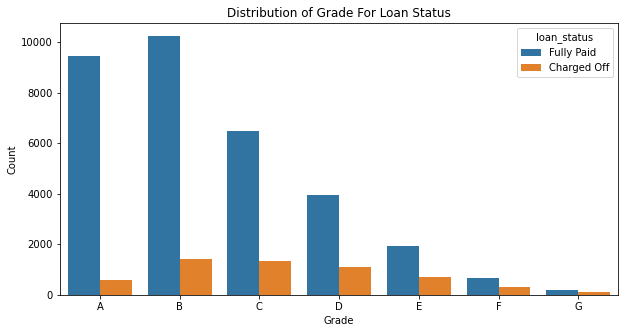

In [67]:
# Distribution of grade based on loan status
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='grade',hue='loan_status')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Distribution of Grade For Loan Status',fontsize=12)
plt.show()

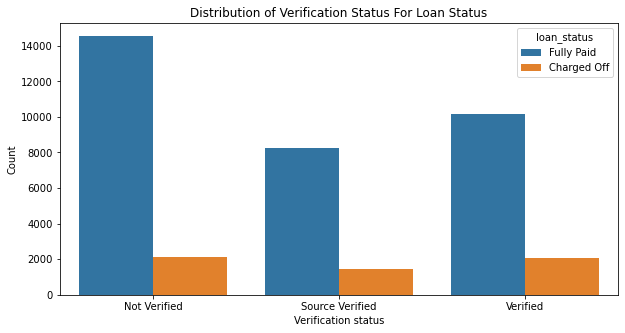

In [68]:
# Distribution of employment length based on loan status
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='verification_status',hue='loan_status')
plt.xlabel('Verification status')
plt.ylabel('Count')
plt.title('Distribution of Verification Status For Loan Status',fontsize=12)
plt.show()

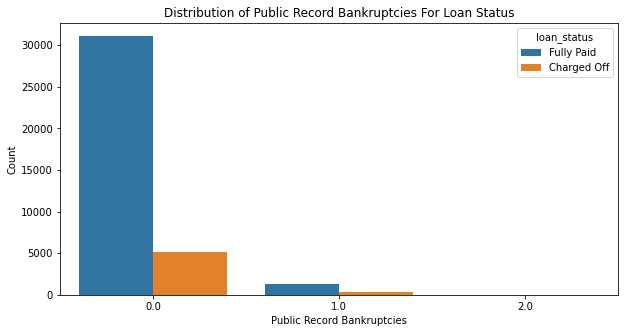

In [69]:
# Distribution of public record bankruptcies based on loan status
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='pub_rec_bankruptcies',hue='loan_status')
plt.xlabel('Public Record Bankruptcies')
plt.ylabel('Count')
plt.title('Distribution of Public Record Bankruptcies For Loan Status',fontsize=12)
plt.show()

# Bivariate Analysis

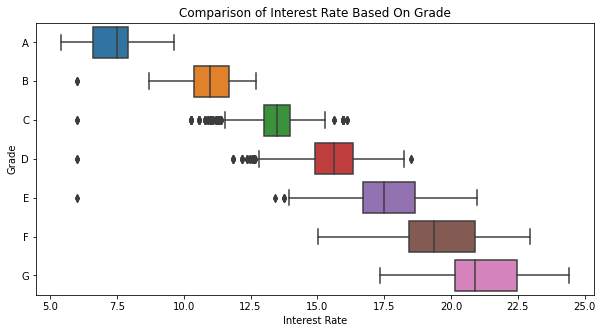

In [70]:
# Comparison of interest rate based on grade
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='int_rate',y='grade')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade',fontsize=12)
plt.show()

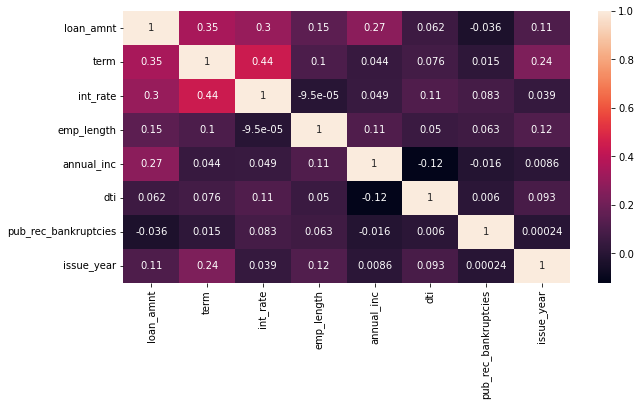

In [71]:
# Heatmap of correlation between variables
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()